David Giacobbi, CPSC 322, Fall 2023, Notebook for HW-8

# Getting Started: Loading the libraries

In [1]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

# Part 1: Random Forests

The goal of this part is to experiment with your random forest implementation, comparing it to the "plain-old" decision tree implementation from HW-7. In each step below, you will use the new "stratified holdout" method to create an inital training and testing set for the comparisons.  

 ## 1. MPG Dataset


(a). Similar to the prior assignments, load and create a "clean" version of the mpg dataset with 3 mpg bin values.

In [2]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
auto.load('auto-mpg.txt')

#  1. Removing all duplicate rows
auto = remove_duplicates(auto)

#  2. Removing all rows with missing values in any of the columns
auto = remove_missing(auto, auto.columns())

# 3. Discretize mpg into 3 bins
discretize(auto, 'mpg', [20, 30])

(b). Create a train and test set using the stratified_holdout function. The test set should be 1/3 of the size of the training set.

In [3]:
auto_train, auto_test = stratified_holdout(auto, 'mpg', int(auto.row_count()/3))

(c). Run tdidt_eval on the mpg training and testing set to classify mpg labels using the cylinders, year, and origin features. 

In [4]:
auto_matrix = tdidt_eval(auto_train, auto_test, 'mpg', ['cyls', 'year', 'origin'])

(d). Print the confusion matrix along with (macro) accuracy and precision, recall, and f-measure scores. 

In [5]:
# Print auto matrix
print(auto_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(auto, ['mpg']):
    acc.append(accuracy(auto_matrix, label))
    prec.append(precision(auto_matrix, label))
    rec.append(recall(auto_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(auto, ['mpg']):
    cur_recall = recall(auto_matrix, label)
    cur_precision = precision(auto_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    3
--------  ---  ---  ---
       1   49    0    0
       2    7   23   10
       3    0    6    5

Average Accuracy: 0.8466666666666667

Average Precision: 0.6671455938697318

Average Recall: 0.6765151515151514

Macro Average f-measure: 0.6615384615384615


(e). Explore the use of different F, M, and N parameters to find a random forest that is on par or better than the decision tree results from above. For this step, use the random_forest_eval function with the corresponding training and testing set use above. Be sure to keep track of your findings as you go. You only need to include the "best" parameterization in the final notebook. Include the same metrics (confusion matrix, accuracy, precision, recall, and f-measure) as for (d).  

In [6]:
forest_auto_matrix = random_forest_eval(auto, auto_train, auto_test, 3, 5, 25, 'mpg', ['cyls', 'year', 'origin'])
print(forest_auto_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(auto, ['mpg']):
    acc.append(accuracy(forest_auto_matrix, label))
    prec.append(precision(forest_auto_matrix, label))
    rec.append(recall(forest_auto_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(auto, ['mpg']):
    cur_recall = recall(forest_auto_matrix, label)
    cur_precision = precision(forest_auto_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    3
--------  ---  ---  ---
       1   49    0    0
       2    7   24    9
       3    0    2    9

Average Accuracy: 0.88

Average Precision: 0.7660256410256411

Average Recall: 0.8060606060606061

Macro Average f-measure: 0.7604319052594914


In [7]:
forest_auto_matrix = random_forest_eval(auto, auto_train, auto_test, 3, 20, 80, 'mpg', ['cyls', 'year', 'origin'])
print(forest_auto_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(auto, ['mpg']):
    acc.append(accuracy(forest_auto_matrix, label))
    prec.append(precision(forest_auto_matrix, label))
    rec.append(recall(forest_auto_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(auto, ['mpg']):
    cur_recall = recall(forest_auto_matrix, label)
    cur_precision = precision(forest_auto_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    3
--------  ---  ---  ---
       1   48    1    0
       2    7   26    7
       3    0    6    5

Average Accuracy: 0.86

Average Precision: 0.6924242424242424

Average Recall: 0.6947124304267162

Macro Average f-measure: 0.6900627662986208


In [8]:
forest_auto_matrix = random_forest_eval(auto, auto_train, auto_test, 3, 100, 180, 'mpg', ['cyls', 'year', 'origin'])
print(forest_auto_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(auto, ['mpg']):
    acc.append(accuracy(forest_auto_matrix, label))
    prec.append(precision(forest_auto_matrix, label))
    rec.append(recall(forest_auto_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(auto, ['mpg']):
    cur_recall = recall(forest_auto_matrix, label)
    cur_precision = precision(forest_auto_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    3
--------  ---  ---  ---
       1   49    0    0
       2    7   23   10
       3    0    6    5

Average Accuracy: 0.8466666666666667

Average Precision: 0.6671455938697318

Average Recall: 0.6765151515151514

Macro Average f-measure: 0.6615384615384615


(f). Write down your observations concerning the comparison and the associated F, M, and N values (i.e., what happens as you change these). Note that since there are few features used for classification, F should have little impact (and few actual choices). However, you should see results with different N and M values. I was able to get up to N large values (over 200) without very much slowdown (but your results may vary).

For the mpg dataset, it was apparent that there was little to work with in the improvement department with random forests. Despite this however, depending on which test set was produced from holdout, larger decision tree forests tended to improve performance in the slightest as seen with the 80 decision tree example. I think that, at some point, with smaller datasets that the random trees will not necessarily differ as you increase the number. Therefore, there was a match in performance between the larger trees in 180 v 80 trees produced.

## 2. Titanic Dataset

(a). Similar to the prior assignments, load data.

In [9]:
titanic = DataTable(['class', 'age', 'gender', 'survival'])
titanic.load('titanic.txt')

(b). Create a train and test set using the stratified_holdout function. The test set should be 1/3 of the size of the training set.

In [10]:
titanic_train, titanic_test = stratified_holdout(titanic, 'survival', int(titanic.row_count()/3))

(c). Run tdidt_eval.

In [11]:
titanic_matrix = tdidt_eval(titanic_train, titanic_test, 'survival', ['class', 'age', 'gender'])

(d). Print the confusion matrix along with (macro) accuracy and precision, recall, and f-measure scores. 

In [12]:
# Print auto matrix
print(titanic_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(titanic, ['survival']):
    acc.append(accuracy(titanic_matrix, label))
    prec.append(precision(titanic_matrix, label))
    rec.append(recall(titanic_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(titanic, ['survival']):
    cur_recall = recall(titanic_matrix, label)
    cur_precision = precision(titanic_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

actual      yes    no
--------  -----  ----
yes         485    11
no          138    98

Average Accuracy: 0.796448087431694

Average Precision: 0.8387868702784691

Average Recall: 0.6965384089666484

Macro Average f-measure: 0.7174806698527412


(e). Explore the use of different F, M, and N parameters to find a random forest that is on par or better than the decision tree results from above. For this step, use the random_forest_eval function with the corresponding training and testing set use above. Be sure to keep track of your findings as you go. You only need to include the "best" parameterization in the final notebook. Include the same metrics (confusion matrix, accuracy, precision, recall, and f-measure) as for (d).  

In [13]:
forest_titanic_matrix = random_forest_eval(titanic, titanic_train, titanic_test, 3, 2, 30, 'survival', ['class', 'age', 'gender'])
print(forest_titanic_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(titanic, ['survival']):
    acc.append(accuracy(forest_titanic_matrix, label))
    prec.append(precision(forest_titanic_matrix, label))
    rec.append(recall(forest_titanic_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(titanic, ['survival']):
    cur_recall = recall(forest_titanic_matrix, label)
    cur_precision = precision(forest_titanic_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

actual      yes    no
--------  -----  ----
yes         478    18
no          133   103

Average Accuracy: 0.7937158469945356

Average Precision: 0.8167818641706457

Average Recall: 0.7000751776927283

Macro Average f-measure: 0.7203130574723114


In [14]:
forest_titanic_matrix = random_forest_eval(titanic, titanic_train, titanic_test, 3, 6, 30, 'survival', ['class', 'age', 'gender'])
print(forest_titanic_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(titanic, ['survival']):
    acc.append(accuracy(forest_titanic_matrix, label))
    prec.append(precision(forest_titanic_matrix, label))
    rec.append(recall(forest_titanic_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(titanic, ['survival']):
    cur_recall = recall(forest_titanic_matrix, label)
    cur_precision = precision(forest_titanic_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

actual      yes    no
--------  -----  ----
yes         485    11
no          138    98

Average Accuracy: 0.796448087431694

Average Precision: 0.8387868702784691

Average Recall: 0.6965384089666484

Macro Average f-measure: 0.7174806698527412


In [15]:
forest_titanic_matrix = random_forest_eval(titanic, titanic_train, titanic_test, 3, 6, 90, 'survival', ['class', 'age', 'gender'])
print(forest_titanic_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(titanic, ['survival']):
    acc.append(accuracy(forest_titanic_matrix, label))
    prec.append(precision(forest_titanic_matrix, label))
    rec.append(recall(forest_titanic_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(titanic, ['survival']):
    cur_recall = recall(forest_titanic_matrix, label)
    cur_precision = precision(forest_titanic_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

actual      yes    no
--------  -----  ----
yes         478    18
no          133   103

Average Accuracy: 0.7937158469945356

Average Precision: 0.8167818641706457

Average Recall: 0.7000751776927283

Macro Average f-measure: 0.7203130574723114


(f). Write down your observations concerning the comparison and the associated F, M, and N values (i.e., what happens as you change these). Note that since there are few features used for classification, F should have little impact (and few actual choices). However, you should see results with different N and M values. I was able to get up to N large values (over 200) without very much slowdown (but your results may vary).

Similar to the mpg dataset, the low number of features for classification makes it difficult to look at changes in F. Therefore, I looked at increasing the M and N values. What I noticed again is that the larger forests and M set leads to the same prediction as the indvidual decision tree. I think this is important because it seems as though for this example that the increase of decision trees will ultimately lead to a convergence on the first cleaned decision tree. However, the right tuning of the ensemble leads to small jumps in accuracy and other performance measures; it is simply a matter of trial and error, keeping in mind the ratio of N to F.

## 3. Student Stress Dataset

TODO: Repeat the steps (a-f) again but for the student stress dataset. Note that the decision tree (tdidt_eval) has fairly good accuracy for this dataset (and to a large degree those above as well), and so it might be hard to "beat" with random forests. 

(a). Similar to the prior assignments, load data.

In [16]:
student_stress = DataTable(['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra', 'stress'])
student_stress.load('student-stress.txt')

(b). Create a train and test set using the stratified_holdout function. The test set should be 1/3 of the size of the training set.

In [17]:
stress_train, stress_test = stratified_holdout(student_stress, 'stress', int(student_stress.row_count()/3))

(c). Run tdidt_eval.

In [18]:
stress_matrix = tdidt_eval(stress_train, stress_test, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])

(d). Print the confusion matrix along with (macro) accuracy and precision, recall, and f-measure scores. 

In [19]:
# Print auto matrix
print(stress_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(student_stress, ['stress']):
    acc.append(accuracy(stress_matrix, label))
    prec.append(precision(stress_matrix, label))
    rec.append(recall(stress_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(student_stress, ['stress']):
    cur_recall = recall(stress_matrix, label)
    cur_precision = precision(stress_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    0
--------  ---  ---  ---
       1  106    3   10
       2    6  103   13
       0    8    7  109

Average Accuracy: 0.9141552511415525

Average Precision: 0.8735317779565567

Average Recall: 0.8713502852224972

Macro Average f-measure: 0.8717291777945934


(e). Explore the use of different F, M, and N parameters to find a random forest that is on par or better than the decision tree results from above. For this step, use the random_forest_eval function with the corresponding training and testing set use above. Be sure to keep track of your findings as you go. You only need to include the "best" parameterization in the final notebook. Include the same metrics (confusion matrix, accuracy, precision, recall, and f-measure) as for (d).  

In [20]:
forest_stress_matrix = random_forest_eval(student_stress, stress_train, stress_test, 8, 20, 60, 'stress', 
                                          ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(forest_stress_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(student_stress, ['stress']):
    acc.append(accuracy(forest_stress_matrix, label))
    prec.append(precision(forest_stress_matrix, label))
    rec.append(recall(forest_stress_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(student_stress, ['stress']):
    cur_recall = recall(forest_stress_matrix, label)
    cur_precision = precision(forest_stress_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    0
--------  ---  ---  ---
       1  102    6   11
       2    1  106   15
       0    3    9  112

Average Accuracy: 0.9178082191780822

Average Precision: 0.8832971372310622

Average Recall: 0.8764070408702879

Macro Average f-measure: 0.8780188274222765


In [21]:
forest_stress_matrix = random_forest_eval(student_stress, stress_train, stress_test, 6, 15, 60, 'stress', 
                                          ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(forest_stress_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(student_stress, ['stress']):
    acc.append(accuracy(forest_stress_matrix, label))
    prec.append(precision(forest_stress_matrix, label))
    rec.append(recall(forest_stress_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(student_stress, ['stress']):
    cur_recall = recall(forest_stress_matrix, label)
    cur_precision = precision(forest_stress_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    0
--------  ---  ---  ---
       1  107   10    2
       2    2  107   13
       0    5   10  109

Average Accuracy: 0.9232876712328767

Average Precision: 0.8867161447773187

Average Recall: 0.8850803674193104

Macro Average f-measure: 0.8856416482302832


In [22]:
forest_stress_matrix = random_forest_eval(student_stress, stress_train, stress_test, 4, 10, 60, 'stress', 
                                          ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(forest_stress_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(student_stress, ['stress']):
    acc.append(accuracy(forest_stress_matrix, label))
    prec.append(precision(forest_stress_matrix, label))
    rec.append(recall(forest_stress_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(student_stress, ['stress']):
    cur_recall = recall(forest_stress_matrix, label)
    cur_precision = precision(forest_stress_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual    1    2    0
--------  ---  ---  ---
       1  106    9    4
       2    5  107   10
       0    3   13  108

Average Accuracy: 0.9196347031963471

Average Precision: 0.8815092757946461

Average Recall: 0.8795910749281205

Macro Average f-measure: 0.8801698888524204


(f). Write down your observations concerning the comparison and the associated F, M, and N values (i.e., what happens as you change these). Note that since there are few features used for classification, F should have little impact (and few actual choices). However, you should see results with different N and M values. I was able to get up to N large values (over 200) without very much slowdown (but your results may vary).

Given that some decent insight has been provided already about increasing the N value in relation to the size of the dataset, the stress dataset gives the chance to explore how changing the F value given the larger amount of features changes the results of the decision tree. Interesting enough there was increase in the f-measure as both the F values and M set size were decreased, even in the presence of an already impressively accurate decision tree. This asserts the hypothesis, that using more trees in the M set and more F features often will provide more information for prediction making in an ensemble method.

# Part 2: k-Means Clustering

The goal of this part is to experiment with your k-means implementation using the (simplified) UCI "iris" dataset (iris.txt in the starter code). 

## 1. Load the dataset

TODO: Load the iris.txt dataset as a DataTable. The columns of the table are: 
1. Sepal length (continuous values)
2. Sepal width (continuous values)
3. Petal length (continous values)
4. Petal width (continuous values)
5. Class (species name)

In [23]:
iris = DataTable(['sep_length', 'sep_width', 'ped_length', 'ped_width', 'class'])
iris.load('iris.txt')

#  1. Removing all duplicate rows
iris = remove_duplicates(iris)

#  2. Removing all rows with missing values in any of the columns
iris = remove_missing(iris, iris.columns())

## 2. Create clusters

TODO: Using the iris data table and your HW8 k-means functions, find clusters for k = 2, k = 3, and k = 4 for the Sepal Width and Petal Width columns. For each of the three k values:  

(a). Call your select_k_random_centroids function to get k initial centroids. 

In [24]:
two_centroids = select_k_random_centroids(iris, 2)
three_centroids = select_k_random_centroids(iris, 3)
four_centroids = select_k_random_centroids(iris, 4)

(b). Call your k_means algorithm using the initial centroids (and using Sepal Width and Petal Width). 

In [25]:
two_means = k_means(iris, two_centroids, ['sep_width', 'ped_width'])
three_means = k_means(iris, three_centroids, ['sep_width', 'ped_width'])
four_means = k_means(iris, four_centroids, ['sep_width', 'ped_width'])

(c). Call the TSS function over the clusters returned. Print the corresponding cluster TSS values. 

In [26]:
two_tss = tss(two_means, ['sep_width', 'ped_width'])
three_tss = tss(three_means, ['sep_width', 'ped_width'])
four_tss = tss(four_means, ['sep_width', 'ped_width'])

print("Two Centroids:", two_tss)
print("Three Centroids:", three_tss)
print("Four Centroids:", four_tss)

Two Centroids: [7.423124999999998, 28.74343434343433]
Three Centroids: [6.753617021276595, 6.113617021276598, 7.4222641509433975]
Four Centroids: [0.8626666666666668, 6.219555555555554, 6.7881481481481485, 2.412121212121212]


(d). Repeat (a)-(c) and compare the results (i.e., with two different initial centroid instances). 

In [27]:
for i in range(2):

    two_centroids = select_k_random_centroids(iris, 2)
    three_centroids = select_k_random_centroids(iris, 3)
    four_centroids = select_k_random_centroids(iris, 4)

    two_means = k_means(iris, two_centroids, ['sep_width', 'ped_width'])
    three_means = k_means(iris, three_centroids, ['sep_width', 'ped_width'])
    four_means = k_means(iris, four_centroids, ['sep_width', 'ped_width'])

    two_tss = tss(two_means, ['sep_width', 'ped_width'])
    three_tss = tss(three_means, ['sep_width', 'ped_width'])
    four_tss = tss(four_means, ['sep_width', 'ped_width'])

    print("Iteration", i)
    print("Two Centroids:", two_tss)
    print("Three Centroids:", three_tss)
    print("Four Centroids:", four_tss)
    print()

Iteration 0
Two Centroids: [28.74343434343433, 7.423124999999998]
Three Centroids: [28.74343434343433, 1.5619047619047621, 1.7437037037037033]
Four Centroids: [5.6347619047619055, 6.113617021276598, 1.727222222222222, 2.6877500000000003]

Iteration 1
Two Centroids: [28.74343434343433, 7.423124999999998]
Three Centroids: [6.113617021276598, 6.753617021276595, 7.4222641509433975]
Four Centroids: [5.6347619047619055, 2.321081081081081, 2.083809523809524, 6.113617021276598]



## 3. Plotting clusters

TODO: Again using the iris data and the Sepal and Petal Width columns, write code below to: 

Note that within a particular figure---started with plt.figure()---you can call plt.plot(...) multiple times to display different sets of data points (e.g., each with a different color).

(a). Generate clusters for k=2, k=3, k=4, k=5, k=6, and k=7. 

In [28]:
two_centroids = select_k_random_centroids(iris, 2)
three_centroids = select_k_random_centroids(iris, 3)
four_centroids = select_k_random_centroids(iris, 4)
five_centroids = select_k_random_centroids(iris, 5)
six_centroids = select_k_random_centroids(iris, 6)
seven_centroids = select_k_random_centroids(iris, 7)

two_means = k_means(iris, two_centroids, ['sep_width', 'ped_width'])
three_means = k_means(iris, three_centroids, ['sep_width', 'ped_width'])
four_means = k_means(iris, four_centroids, ['sep_width', 'ped_width'])
five_means = k_means(iris, five_centroids, ['sep_width', 'ped_width'])
six_means = k_means(iris, six_centroids, ['sep_width', 'ped_width'])
seven_means = k_means(iris, seven_centroids, ['sep_width', 'ped_width'])

(b). For each k, create a scatterplot showing the clusters. Each data point in a cluster should have the same color. The seven colors should be: 'b' (blue), 'r' (red), 'g' (green), 'c' (cyan), 'm' (magenta), 'y' (yellow), and 'k' (khaki). 

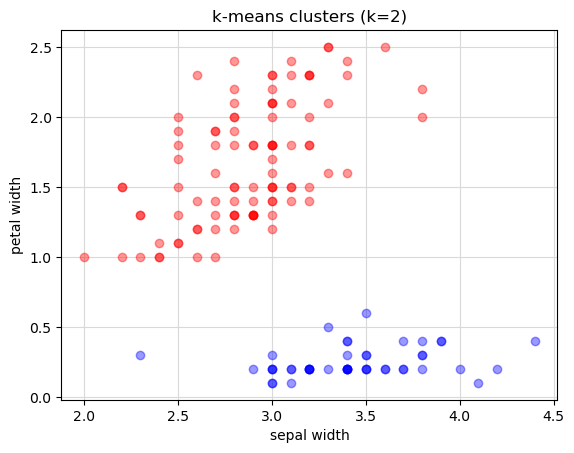

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([two_means[0][i]['sep_width'] for i in range(two_means[0].row_count())], 
         [two_means[0][i]['ped_width'] for i in range(two_means[0].row_count())], 
         'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([two_means[1][i]['sep_width'] for i in range(two_means[1].row_count())], 
         [two_means[1][i]['ped_width'] for i in range(two_means[1].row_count())], 
         'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title("k-means clusters (k=2)")
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()
plt.close()

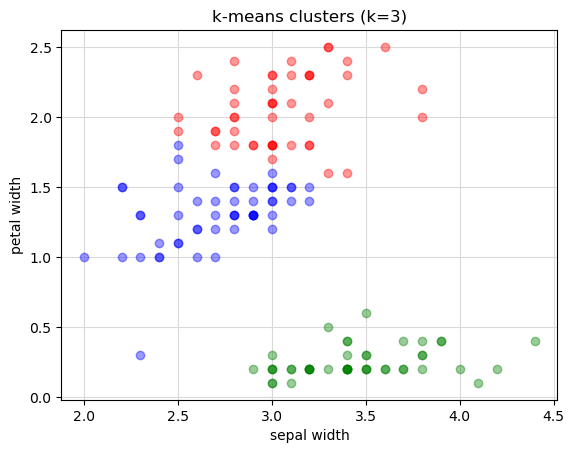

In [30]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([three_means[0][i]['sep_width'] for i in range(three_means[0].row_count())], 
         [three_means[0][i]['ped_width'] for i in range(three_means[0].row_count())], 
         'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([three_means[1][i]['sep_width'] for i in range(three_means[1].row_count())], 
         [three_means[1][i]['ped_width'] for i in range(three_means[1].row_count())], 
         'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([three_means[2][i]['sep_width'] for i in range(three_means[2].row_count())], 
         [three_means[2][i]['ped_width'] for i in range(three_means[2].row_count())], 
         'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title("k-means clusters (k=3)")
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()
plt.close()

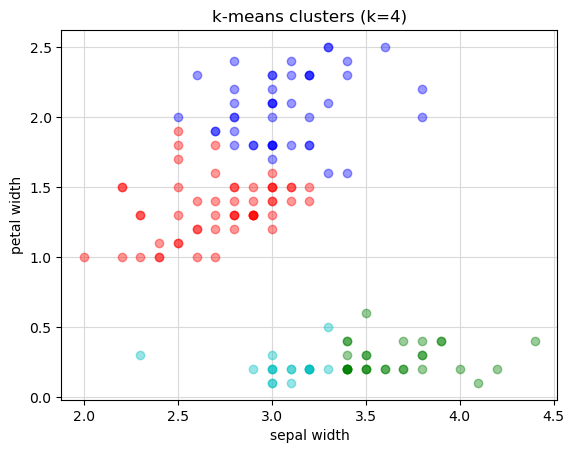

In [31]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([four_means[0][i]['sep_width'] for i in range(four_means[0].row_count())], 
         [four_means[0][i]['ped_width'] for i in range(four_means[0].row_count())], 
         'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([four_means[1][i]['sep_width'] for i in range(four_means[1].row_count())], 
         [four_means[1][i]['ped_width'] for i in range(four_means[1].row_count())], 
         'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([four_means[2][i]['sep_width'] for i in range(four_means[2].row_count())], 
         [four_means[2][i]['ped_width'] for i in range(four_means[2].row_count())], 
         'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([four_means[3][i]['sep_width'] for i in range(four_means[3].row_count())], 
         [four_means[3][i]['ped_width'] for i in range(four_means[3].row_count())], 
         'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title("k-means clusters (k=4)")
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()
plt.close()

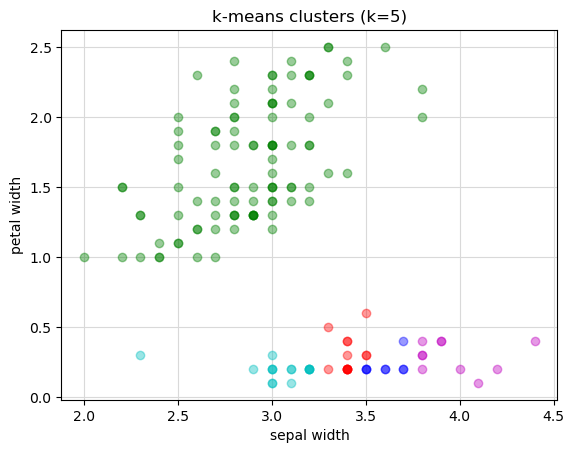

In [32]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([five_means[0][i]['sep_width'] for i in range(five_means[0].row_count())], 
         [five_means[0][i]['ped_width'] for i in range(five_means[0].row_count())], 
         'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([five_means[1][i]['sep_width'] for i in range(five_means[1].row_count())], 
         [five_means[1][i]['ped_width'] for i in range(five_means[1].row_count())], 
         'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([five_means[2][i]['sep_width'] for i in range(five_means[2].row_count())], 
         [five_means[2][i]['ped_width'] for i in range(five_means[2].row_count())], 
         'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([five_means[3][i]['sep_width'] for i in range(five_means[3].row_count())], 
         [five_means[3][i]['ped_width'] for i in range(five_means[3].row_count())], 
         'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([five_means[4][i]['sep_width'] for i in range(five_means[4].row_count())], 
         [five_means[4][i]['ped_width'] for i in range(five_means[4].row_count())], 
         'm.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title("k-means clusters (k=5)")
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()
plt.close()

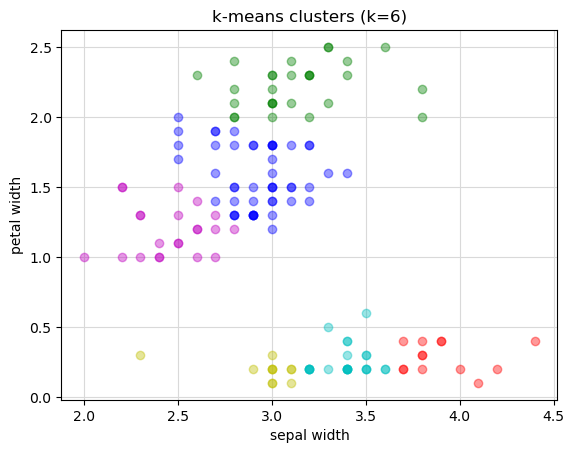

In [33]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([six_means[0][i]['sep_width'] for i in range(six_means[0].row_count())], 
         [six_means[0][i]['ped_width'] for i in range(six_means[0].row_count())], 
         'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([six_means[1][i]['sep_width'] for i in range(six_means[1].row_count())], 
         [six_means[1][i]['ped_width'] for i in range(six_means[1].row_count())], 
         'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([six_means[2][i]['sep_width'] for i in range(six_means[2].row_count())], 
         [six_means[2][i]['ped_width'] for i in range(six_means[2].row_count())], 
         'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([six_means[3][i]['sep_width'] for i in range(six_means[3].row_count())], 
         [six_means[3][i]['ped_width'] for i in range(six_means[3].row_count())], 
         'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([six_means[4][i]['sep_width'] for i in range(six_means[4].row_count())], 
         [six_means[4][i]['ped_width'] for i in range(six_means[4].row_count())], 
         'm.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([six_means[5][i]['sep_width'] for i in range(six_means[5].row_count())], 
         [six_means[5][i]['ped_width'] for i in range(six_means[5].row_count())], 
         'y.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title("k-means clusters (k=6)")
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()
plt.close()

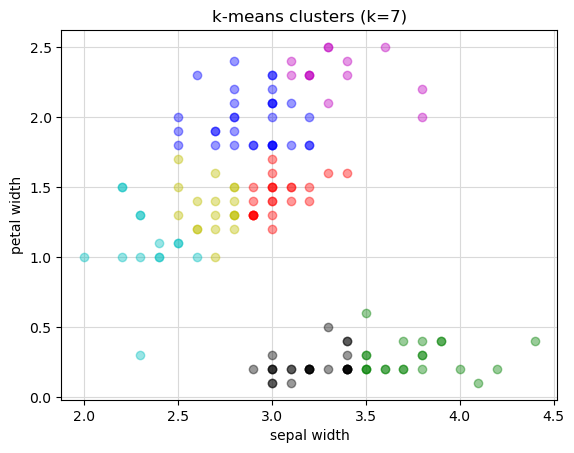

In [34]:
plt.figure()
plt.grid(color='0.85', zorder=0)
plt.plot([seven_means[0][i]['sep_width'] for i in range(seven_means[0].row_count())], 
         [seven_means[0][i]['ped_width'] for i in range(seven_means[0].row_count())], 
         'b.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([seven_means[1][i]['sep_width'] for i in range(seven_means[1].row_count())], 
         [seven_means[1][i]['ped_width'] for i in range(seven_means[1].row_count())], 
         'r.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([seven_means[2][i]['sep_width'] for i in range(seven_means[2].row_count())], 
         [seven_means[2][i]['ped_width'] for i in range(seven_means[2].row_count())], 
         'g.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([seven_means[3][i]['sep_width'] for i in range(seven_means[3].row_count())], 
         [seven_means[3][i]['ped_width'] for i in range(seven_means[3].row_count())], 
         'c.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([seven_means[4][i]['sep_width'] for i in range(seven_means[4].row_count())], 
         [seven_means[4][i]['ped_width'] for i in range(seven_means[4].row_count())], 
         'm.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([seven_means[5][i]['sep_width'] for i in range(seven_means[5].row_count())], 
         [seven_means[5][i]['ped_width'] for i in range(seven_means[5].row_count())], 
         'y.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.plot([seven_means[6][i]['sep_width'] for i in range(seven_means[6].row_count())], 
         [seven_means[6][i]['ped_width'] for i in range(seven_means[6].row_count())], 
         'k.', alpha=.4, linestyle='', markersize=12, zorder=3)
plt.title("k-means clusters (k=7)")
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()
plt.close()

The following is an example of what your k=7 scatterplot should look like: 

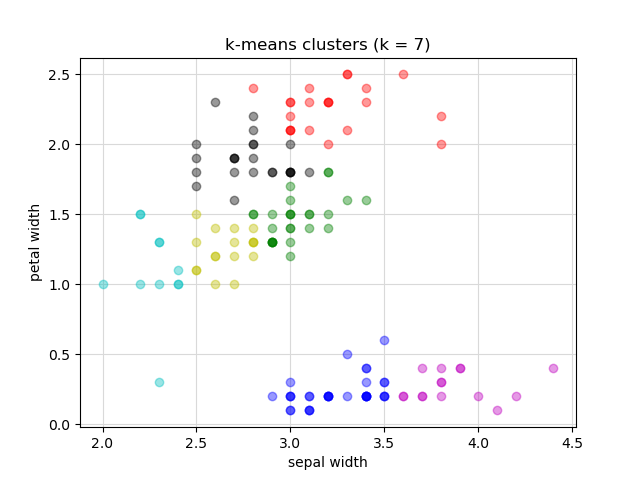

# Issues, Challenges, and Observations

One of the biggest challenges was working with the tree evaluations for the random forests. I think that this homework opened up issues that I had not initially discovered with my initial decision tree. I thought that the clustering with k-means, however, was much easier to implement. I thought that the graphing provided great insight. Depending on the specificness of the classification, I thought that the two clusters provided the best division of colors. However, there could be situations where 5 clusters or more might have been useful. 

Overall, I though that the random forests provided great insight to the overall capabilities of decision trees. It was a great look into the power and usefulness of ensembles during certain analytical situations. I think it is interesting to note that for some datasets, the decision tree itself is already a pretty effective classifier. This would imply that there are circumstances in which an ensemble like random forests may not be necessary to build, if the decision tree already proveds to be effective as seen in the titanic and stress examples.